In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(['ls', 'datasets']).decode('utf8'))

Sign-language-digits-dataset



- sign zero is between indexes 204 and 408. Number of zero sign is 205
- sign one is between indexes 822 and 1027. Number of one sign is 206. There fore, we will use 205 sample.

(-0.5, 63.5, 63.5, -0.5)

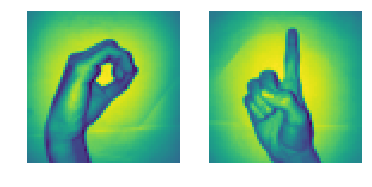

In [12]:
x_l = np.load('datasets/Sign-language-digits-dataset/X.npy')
y_l = np.load('datasets/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')


In [13]:
X = np.concatenate((x_l[204: 409], x_l[822: 1027]), axis = 0)

z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0], 1)
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


- The shape of the X is (410, 64, 64)
    - 410 means that we have 410 images (zero and one signs)
    - 64 means that our image size is 64x64 (64x64 pixels)
- The shape of the Y is (410,1)
    - 410 means that we have 410 labels (0 and 1)
- Lets split X and Y into train and test sets.
    - test_size = percentage of test size. test = 15% and train = 75%
    - random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [17]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])
print('X train flatten', X_train_flatten.shape)
print('X test flatten', X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [19]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [23]:
def initialize_weights_and_bias(dimension):
    # return array filled with 0.01
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

In [24]:
# w,b = initialize_weights_and_bias(4096)

In [25]:
# z = np.dot(w.T, x_train) + b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [26]:
y_head = sigmoid(0)
y_head

0.5

In [42]:
def forward_propagation(x, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head)-(1-y_train) * np.log(1-yhead)
    cost = (np.sum(loss))/x_train.shape[1]
    return cost

In [52]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head)-(1-y_train) * np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    return cost, gradients

In [61]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i, cost))
            
    # update (learn) parameters weights and bias
    parameters = {'weight': w, 'bias': b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel('Number of Iterarion')
    plt.ylabel('Cost')
    plt.show()
    return parameters, gradients, cost_list

In [30]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(z.shape[1]):
#         if z  > 0.5, our prediction is sign one (y_head =1)
#         if z  <= 0.5, our prediction is sign zero (y_head =0)
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
            
    return Y_prediction

In [59]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0] # that is 4096
    w, b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    y_prediction_test = predict(parameters['weight'], parameters['bias'], x_test)
    y_prediction_train = predict(parameters['weight'], parameters['bias'], x_train)
    
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


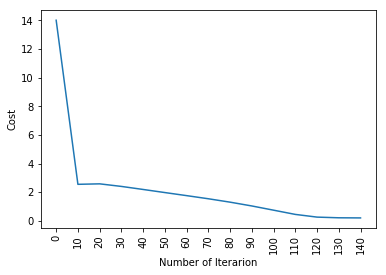

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [64]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, num_iterations = 150)

In [67]:
from sklearn import linear_model
logreg =linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print('test accuracy: {}'.format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print('train accuracy: {}'.format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871
train accuracy: 1.0


In [81]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {'weight1': np.random.randn(3, x_train.shape[0]) * 0.1,
                'bias1': np.zeros((3,1)),
                'weight2': np.random.randn(y_train.shape[0], 3) * 0.1,
                'bias2': np.zeros((y_train.shape[0], 1))
                 }
    return parameters

In [83]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters['weight1'], x_train) + parameters['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['weight2'], A1) + parameters['bias2']
    A2 = sigmoid(Z2)
    
    cache = {'Z1': Z1,
            'A1': A1,
            'Z2': Z2,
            'A2': A2}
    return A2, cache

In [73]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [75]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [77]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {'weight1': parameters['weight1']-learning_rate*grads['dweight1'],
                  'bias1': parameters['bias1']-learning_rate*grads['dbias1'],
                  'weight2': parameters['weight2']-learning_rate*grads['dweight2'],
                  'bias2': parameters['bias2']-learning_rate*grads['dbias2']
                 }
    return parameters

In [78]:
def predict_NN(parameters, x_test):
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
            
    return Y_prediction

In [93]:
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
    
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel('Number of Iteration')
    plt.ylabel('Cost')
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)

    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    return parameters

Cost after iteration 0: 0.474666
Cost after iteration 100: 0.338093
Cost after iteration 200: 0.287325
Cost after iteration 300: 0.229724
Cost after iteration 400: 0.182047
Cost after iteration 500: 0.145347
Cost after iteration 600: 0.118855
Cost after iteration 700: 0.099770
Cost after iteration 800: 0.085467
Cost after iteration 900: 0.074317
Cost after iteration 1000: 0.065315
Cost after iteration 1100: 0.057821
Cost after iteration 1200: 0.051439
Cost after iteration 1300: 0.045947
Cost after iteration 1400: 0.041220
Cost after iteration 1500: 0.037160
Cost after iteration 1600: 0.033673
Cost after iteration 1700: 0.030666
Cost after iteration 1800: 0.028055
Cost after iteration 1900: 0.025770
Cost after iteration 2000: 0.023757
Cost after iteration 2100: 0.021974
Cost after iteration 2200: 0.020392
Cost after iteration 2300: 0.018989
Cost after iteration 2400: 0.017748


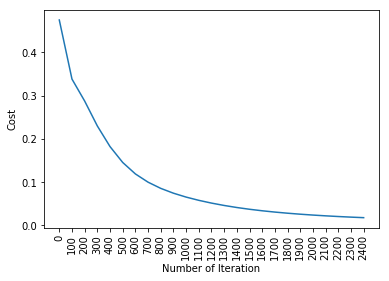

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [95]:
parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations=2500)

In [96]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [104]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print('Accuracy mean: ' + str(mean))
print('Accuracy variance: ' + str(variance))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
232/232 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.4914
Epoch 2/100
232/232 [==============================] - 0s 89us/step - loss: 0.6927 - acc: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 98us/step - loss: 0.6922 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 92us/step - loss: 0.6916 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 88us/step - loss: 0.6907 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 96us/step - loss: 0.6893 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 80us/step - loss: 0.6889 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 83us/step - loss: 0.6869 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 88us/step - loss: 0.6878 - acc: 0.5431
Epoch 10

232/232 [==============================] - 0s 89us/step - loss: 0.2920 - acc: 0.9526
Epoch 79/100
232/232 [==============================] - 0s 95us/step - loss: 0.2990 - acc: 0.9440
Epoch 80/100
232/232 [==============================] - 0s 79us/step - loss: 0.2913 - acc: 0.9612
Epoch 81/100
232/232 [==============================] - 0s 74us/step - loss: 0.2906 - acc: 0.9483
Epoch 82/100
232/232 [==============================] - 0s 69us/step - loss: 0.2873 - acc: 0.9483
Epoch 83/100
232/232 [==============================] - 0s 70us/step - loss: 0.2835 - acc: 0.9483
Epoch 84/100
232/232 [==============================] - 0s 69us/step - loss: 0.2789 - acc: 0.9526
Epoch 85/100
232/232 [==============================] - 0s 69us/step - loss: 0.2760 - acc: 0.9612
Epoch 86/100
232/232 [==============================] - 0s 68us/step - loss: 0.2741 - acc: 0.9569
Epoch 87/100
232/232 [==============================] - 0s 65us/step - loss: 0.2734 - acc: 0.9569
Epoch 88/100
232/232 [===========

232/232 [==============================] - 0s 68us/step - loss: 0.0719 - acc: 0.9784
Epoch 62/100
232/232 [==============================] - 0s 78us/step - loss: 0.0687 - acc: 0.9871
Epoch 63/100
232/232 [==============================] - 0s 71us/step - loss: 0.0720 - acc: 0.9828
Epoch 64/100
232/232 [==============================] - 0s 75us/step - loss: 0.0678 - acc: 0.9828
Epoch 65/100
232/232 [==============================] - 0s 72us/step - loss: 0.0696 - acc: 0.9784
Epoch 66/100
232/232 [==============================] - 0s 70us/step - loss: 0.0645 - acc: 0.9828
Epoch 67/100
232/232 [==============================] - 0s 69us/step - loss: 0.0623 - acc: 0.9871
Epoch 68/100
232/232 [==============================] - 0s 69us/step - loss: 0.0813 - acc: 0.9741
Epoch 69/100
232/232 [==============================] - 0s 77us/step - loss: 0.0864 - acc: 0.9698
Epoch 70/100
232/232 [==============================] - 0s 73us/step - loss: 0.0702 - acc: 0.9784
Epoch 71/100
232/232 [===========

232/232 [==============================] - 0s 76us/step - loss: 0.1588 - acc: 0.9483
Epoch 44/100
232/232 [==============================] - 0s 75us/step - loss: 0.1695 - acc: 0.9353
Epoch 45/100
232/232 [==============================] - 0s 82us/step - loss: 0.1676 - acc: 0.9397
Epoch 46/100
232/232 [==============================] - 0s 73us/step - loss: 0.1525 - acc: 0.9440
Epoch 47/100
232/232 [==============================] - 0s 71us/step - loss: 0.1437 - acc: 0.9483
Epoch 48/100
232/232 [==============================] - 0s 75us/step - loss: 0.1322 - acc: 0.9741
Epoch 49/100
232/232 [==============================] - 0s 72us/step - loss: 0.1265 - acc: 0.9526
Epoch 50/100
232/232 [==============================] - 0s 70us/step - loss: 0.1330 - acc: 0.9655
Epoch 51/100
232/232 [==============================] - 0s 70us/step - loss: 0.1507 - acc: 0.9440
Epoch 52/100
232/232 [==============================] - 0s 70us/step - loss: 0.1358 - acc: 0.9612
Epoch 53/100
232/232 [===========